In [1]:
import sys
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

print("Python: {}".format(sys.version))
print("scipy: {}".format(scipy.__version__))
print("numpy: {}".format(np.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("pandas: {}".format(pd.__version__))
print("sklearn: {}".format(sklearn.__version__))

Python: 3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]
scipy: 1.6.0
numpy: 1.19.5
matplotlib: 3.3.4
pandas: 1.2.2
sklearn: 0.24.1


In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [3]:
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names)

In [4]:
# preprocess the data
df.replace('?', -99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [5]:
# explore the dataset
print(df.loc[10])

# print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [6]:
# describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'uniform_cell_size'}>,
        <AxesSubplot:title={'center':'uniform_cell_shape'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'single_epithelial_size'}>,
        <AxesSubplot:title={'center':'bland_chromatin'}>],
       [<AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

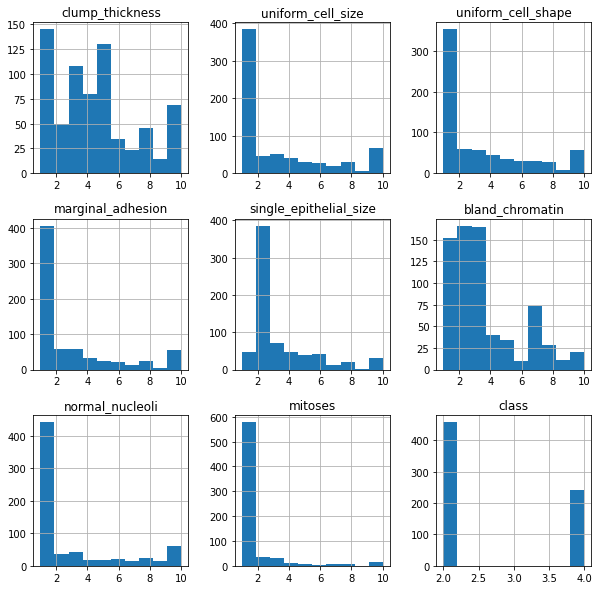

In [7]:
# plot histograms for each variable
df.hist(figsize=(10, 10))

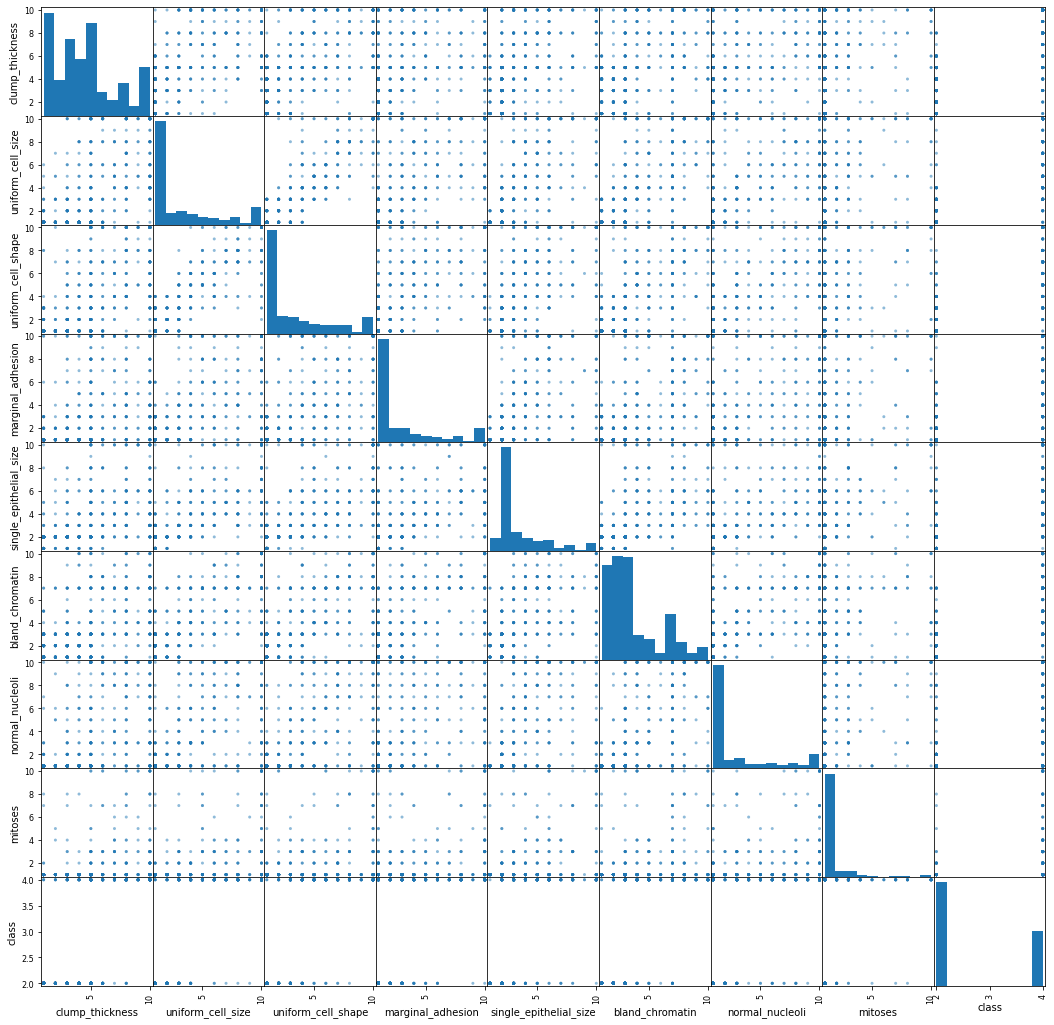

In [8]:
# create scatter plot matrix
scatter_matrix(df, figsize=(18, 18))
plt.show()

In [9]:
# create X and y datasets for training
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# testing options
seed = 42
scoring = 'accuracy'

In [11]:
# define training model
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

In [12]:
# evaluate each model 
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.969578 (0.017967)
SVM: 0.643929 (0.066029)


In [13]:
# make predictions on validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        98
           4       0.93      0.98      0.95        42

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.7
              precision    recall  f1-score   support

           2       0.70      1.00      0.82        98
           4       0.00      0.00      0.00        42

    accuracy                           0.70       140
   macro avg       0.35      0.50      0.41       140
weighted avg       0.49      0.70      0.58       140



c:\users\datas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\datas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\datas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [14]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.7
[2]
